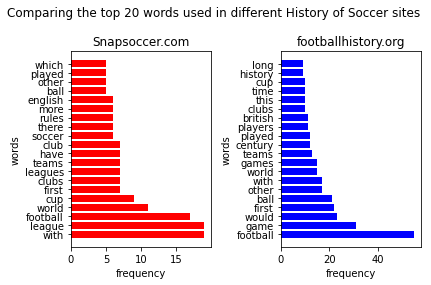

In [1]:
import requests, re
from bs4 import BeautifulSoup
from collections import Counter
import operator
import matplotlib.pyplot as plt

def getTop20(url, start, end):
    r = requests.get(url)

    soup = BeautifulSoup(r.text, 'html.parser')

    rawText = soup.get_text()

    lines = rawText.split('\n')
    # take out lines that are empty, before start, after end
    lines = lines[lines.index(start):lines.index(end)]

    allText = ""
    for line in lines:
        if(line != ""):
            allText += " " + line + " "

    allWords = allText.lower().split(" ")

    for i in range(len(allWords)):
        allWords[i] = re.sub('[,".&|:@,<>()*$?!\\/;=”“‘\[\]]', "", allWords[i])
        allWords[i] = re.sub('^[0-9.]*$', "", allWords[i])
        allWords[i] = re.sub(r'[^\x00-\x7F]+',' ', allWords[i])
    


    wordDict = {}
    for i, word in enumerate(allWords):
        try:
            wordDict[word] = wordDict[word]+1
        except:
            wordDict[word] = 1
    wordsToRemove = ["", "to", "of", "were", "that", "and", "was", "at", "i", "not", "by", "it", "the", "in", "a", "for", "as", "is", "be", "to", "but", "on", "are", "from"]
    for word in wordsToRemove :
        wordDict.pop(word, None)
    if " " in wordDict.keys():
        wordDict.pop(" ", None)
    sortedWordFreqency = sorted(wordDict .items(), key = operator.itemgetter(1), reverse=True)
    
        
    return (sortedWordFreqency[:20])



Url1 = "https://snapsoccer.com/youth-soccer/a-brief-history-of-soccer/"
Url2 = "https://www.footballhistory.org/"

start1 = "A Brief History of Soccer | Soccer Education"
end1 = "English Premier League"

start2 = "The history of football (soccer)"
end2 = "More articles"

top20First = getTop20(Url1, start1, end1)
top20Second = getTop20(Url2, start2, end2)

#plot the two graps on the same figure
fig, (ax, bx) = plt.subplots(1,2) 
fig.suptitle("Comparing the top 20 words used in different History of Soccer sites ")
ax.barh([ x [0] for x in top20First ],[ x [1] for x in top20First ], color ='r')
ax.set_xlabel('frequency')
ax.set_ylabel('words')
bx.set_xlabel('frequency')
bx.set_ylabel('words')

ax.set_title("Snapsoccer.com")
bx.set_title("footballhistory.org")
bx.barh([ x [0] for x in top20Second ],[ x [1] for x in top20Second], color ='b')
plt.tight_layout()
plt.show()